In [8]:
import numpy as np 
import copy
from statistics import correlation
from scipy.special import legendre
import chaospy
from Ishigami_functions import estimate_sobol, sobol_mc, generate_rvs

import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 13}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

# A simple example of polynomial chaos expansion (PCE)

Consider the input random vector $\mathbf{Z} = Z_{1}, Z_{2}, Z_{3}$
$$f(\mathbf{Z}) = \sin(Z_{1}) + a\sin^2 (Z_{2}) + b Z_{3}^{4} \sin(Z_{1}), \qquad Z_{i} \sim U(-\pi, \pi). $$
with $a=5, b=0.1$.

Assume that the random output $Y = f(\mathbf{Z})$ has finite variance, it can be cast as the following polynomial chaos expansion: 
$$
Y = \sum_{\alpha \in \mathbb{N}^{3}} y_{\alpha} \Psi_{\alpha}(\mathbf{Z})
$$
where 

* $\Psi_{\alpha}(\mathbf{Z}) = \Pi_{i=1}^{3} P_{\alpha_{i}} (Z_{i})$: basis functions are multi-variate orthogonal polynomials that are products of univariate orthonormal polynomials. 
* $y_{\alpha}$: coefficients to be computed. 
* Since the input variables are uniform, we employ Legendre polynomials. 

In [64]:
def f_fun(z1, z2, z3, a=5, b=0.1):
    return np.sin(z1) + a * (np.sin(z2)**2) + b* np.sin(z1) * (z3**4)

In [65]:
Z1 = chaospy.Uniform(-np.pi, np.pi)
Z2 = chaospy.Uniform(-np.pi, np.pi)
Z3 = chaospy.Uniform(-np.pi, np.pi)
distribution = chaospy.J(Z1, Z2, Z3)

In [76]:
polynomial_order = 1
polynomial_expansion = chaospy.generate_expansion(
    polynomial_order, distribution)

In [77]:
polynomial_expansion


polynomial([1.0, q2, q1, q0])

In [78]:
samples = distribution.sample(1000)
evals = f_fun(z1=samples[0, :], z2=samples[1, :], z3=samples[2, :], a=5, b=0.1)
np.shape(evals)

(1000,)

In [79]:
fitted_polynomial = chaospy.fit_regression(
    polynomial_expansion, samples, evals)

In [88]:
fitted_polynomial[3]

IndexError: invalid index to scalar variable.

ValueError: x and y must have same first dimension, but have shapes (1000,) and (3, 1000)

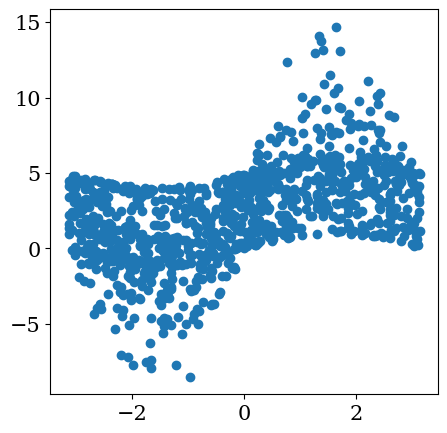

In [83]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(samples[0, :], evals)

ax.plot(samples[0, :], fitted_polynomial(samples))